Note:

- CE = Cardioembolic
- LAA = Large Artery Atherosclerosis

CE = 1 and LAA = 0

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train=pd.read_csv("train.csv")

In [3]:
df_train

image_id  center_id patient_id  image_num label
0    006388_0         11     006388          0    CE
1    008e5c_0         11     008e5c          0    CE
2    00c058_0         11     00c058          0   LAA
3    01adc5_0         11     01adc5          0   LAA
4    026c97_0          4     026c97          0    CE
..        ...        ...        ...        ...   ...
749  fe9645_0          3     fe9645          0    CE
750  fe9bec_0          4     fe9bec          0   LAA
751  ff14e0_0          6     ff14e0          0    CE
752  ffec5c_0          7     ffec5c          0   LAA
753  ffec5c_1          7     ffec5c          1   LAA

[754 rows x 5 columns]

In [4]:
df_train.shape

(754, 5)

In [5]:
df_train.head()

image_id  center_id patient_id  image_num label
0  006388_0         11     006388          0    CE
1  008e5c_0         11     008e5c          0    CE
2  00c058_0         11     00c058          0   LAA
3  01adc5_0         11     01adc5          0   LAA
4  026c97_0          4     026c97          0    CE

In [6]:
df_test=pd.read_csv("test.csv")

In [7]:
df_test

image_id  center_id patient_id  image_num
0  006388_0         11     006388          0
1  008e5c_0         11     008e5c          0
2  00c058_0         11     00c058          0
3  01adc5_0         11     01adc5          0

In [8]:
df_test.shape

(4, 4)

In [9]:
df_test.head()

image_id  center_id patient_id  image_num
0  006388_0         11     006388          0
1  008e5c_0         11     008e5c          0
2  00c058_0         11     00c058          0
3  01adc5_0         11     01adc5          0

In [10]:
df_other=pd.read_csv("other.csv")

In [11]:
df_other

image_id patient_id  image_num  other_specified    label
0    01f2b3_0     01f2b3          0              NaN  Unknown
1    01f2b3_1     01f2b3          1              NaN  Unknown
2    02ebd5_0     02ebd5          0              NaN  Unknown
3    0412ab_0     0412ab          0              NaN  Unknown
4    04414e_0     04414e          0  Hypercoagulable    Other
..        ...        ...        ...              ...      ...
391  faaa7e_0     faaa7e          0              NaN  Unknown
392  fd0f11_0     fd0f11          0              NaN  Unknown
393  fd0f11_1     fd0f11          1              NaN  Unknown
394  fd83c3_0     fd83c3          0              NaN  Unknown
395  febb2b_0     febb2b          0              NaN  Unknown

[396 rows x 5 columns]

In [12]:
df_other.shape

(396, 5)

In [13]:
df_other.head()

image_id patient_id  image_num  other_specified    label
0  01f2b3_0     01f2b3          0              NaN  Unknown
1  01f2b3_1     01f2b3          1              NaN  Unknown
2  02ebd5_0     02ebd5          0              NaN  Unknown
3  0412ab_0     0412ab          0              NaN  Unknown
4  04414e_0     04414e          0  Hypercoagulable    Other

In [14]:
#The nunique() method returns the number of unique values for each column.

train_patients = df_train['patient_id'].nunique()
test_patients = df_test['patient_id'].nunique()
other_patients = df_other['patient_id'].nunique()

print("train_patients: ", train_patients)
print("test_patients: ", test_patients)
print("other_patients: ", other_patients)

train_patients:  632
test_patients:  4
other_patients:  336


In [15]:
df_train['label'] = df_train['label'].replace({'CE':1, 'LAA':0})

In [16]:
df_train.head()

image_id  center_id patient_id  image_num  label
0  006388_0         11     006388          0      1
1  008e5c_0         11     008e5c          0      1
2  00c058_0         11     00c058          0      0
3  01adc5_0         11     01adc5          0      0
4  026c97_0          4     026c97          0      1

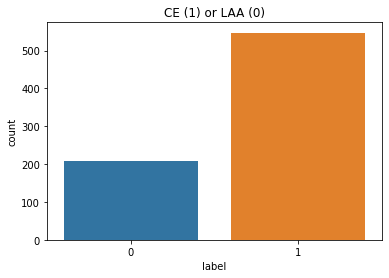

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x = 'label', data = df_train)
ax.set_title("CE (1) or LAA (0)")

plt.show()

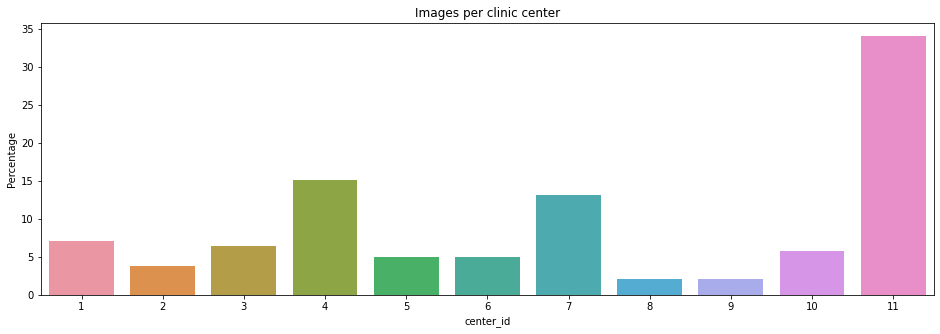

In [21]:
labels = df_train.groupby('label')['label'].count().div(len(df_train)).mul(100)
centers = df_train.groupby("center_id")['center_id'].count().div(len(df_train)).mul(100)

fig, ax = plt.subplots(figsize=(16,5))

sns.barplot(x=centers.index, y=centers.values)
ax.set_title("Images per clinic center"), ax.set_ylabel("Percentage")
plt.show()

In [72]:
import cv2
first_img = cv2.imread("0ed87f_0.tif")

In [26]:
first_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [27]:
first_img.shape

(19149, 6285, 3)

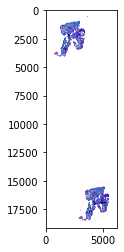

In [28]:
plt.imshow(first_img)

In [80]:
first_img_new = first_img.resize

In [81]:
first_img_new

<function ndarray.resize>

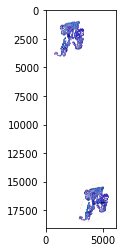

In [75]:
plt.imshow(first_img_new)

In [76]:
first_img_new.shape

(19049, 6185, 3)

In [29]:
second_img = cv2.imread("1f018f_0.tif")

In [31]:
second_img

array([[[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       ...,

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]],

       [[254, 216, 234],
        [254, 216, 234],
        [254, 216, 234],
        ...,
        [254, 216, 234],
        [254, 216, 234],
        [254, 216, 234]]

In [32]:
second_img.shape

(33068, 8579, 3)

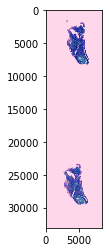

In [33]:
plt.imshow(second_img)

In [37]:
third_img = cv2.imread("20d5cf_0.tif")

In [38]:
third_img

array([[[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       ...,

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]],

       [[255, 241, 255],
        [255, 241, 255],
        [255, 241, 255],
        ...,
        [255, 241, 255],
        [255, 241, 255],
        [255, 241, 255]]

In [39]:
third_img.shape

(24946, 11032, 3)

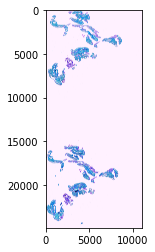

In [40]:
plt.imshow(third_img)

In [49]:
df_train["label"].value_counts()

1    547
0    207
Name: label, dtype: int64

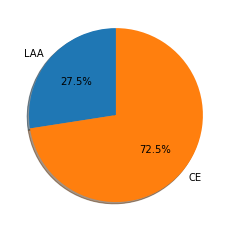

In [52]:
labels = "LAA", "CE"
counts = [207 ,547]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax.axis("off")
plt.show()

In [65]:
p_label = pd.pivot_table(df_train, 
               index='patient_id', 
               columns='label', 
               values=['image_id'], 
               aggfunc={'image_id':[np.size]}
              )
p_label.columns = [f'{c}' for _, _, c in p_label.columns]
p_label['label_cnt'] =2-p_label.isna().sum(axis=1)

p_label['total']= p_label.sum(axis=1)

p_label

0    1  label_cnt  total
patient_id                            
006388      NaN  1.0          1    2.0
008e5c      NaN  1.0          1    2.0
00c058      1.0  NaN          1    2.0
01adc5      1.0  NaN          1    2.0
026c97      NaN  1.0          1    2.0
...         ...  ...        ...    ...
fe0cca      NaN  1.0          1    2.0
fe9645      NaN  1.0          1    2.0
fe9bec      1.0  NaN          1    2.0
ff14e0      NaN  1.0          1    2.0
ffec5c      2.0  NaN          1    3.0

[632 rows x 4 columns]

<AxesSubplot:title={'center':'unique num of patients by target category and center'}, xlabel='center_id'>

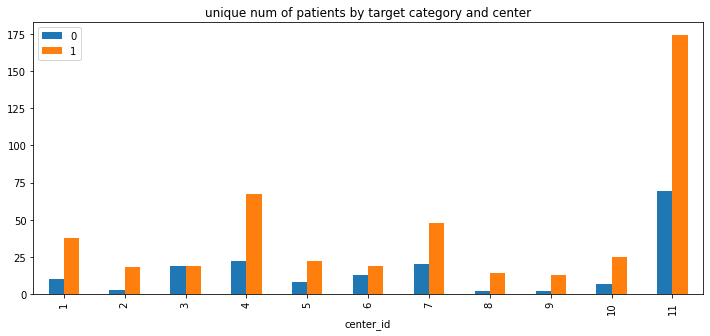

In [66]:
p_label['total']= p_label.sum(axis=1)

p_center = pd.pivot_table(df_train[['center_id', 'label', 'patient_id']].drop_duplicates(keep='first'), 
               index='center_id', 
               columns='label', 
               values=['patient_id'], 
               aggfunc={'patient_id':[np.size]}
              )
p_center.columns = [f'{c}' for _, _, c in p_center.columns]

p_center.plot(kind='bar', figsize=(12, 5), 
              title='unique num of patients by target category and center')

In [67]:
df_train.nunique().to_frame(name = 'Frequency')

Frequency
image_id          754
center_id          11
patient_id        632
image_num           5
label               2

In [68]:
df_test.nunique().to_frame(name = 'Frequency')

Frequency
image_id            4
center_id           1
patient_id          4
image_num           1

In [69]:
df_other.nunique().to_frame(name = 'Frequency')

Frequency
image_id               396
patient_id             336
image_num                5
other_specified          9
label                    2